In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn; seaborn.set()
from sklearn.metrics import mean_squared_error
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

In [4]:
close = pd.read_csv("../Data/close.csv", index_col="TradingDate", parse_dates=True)
high = pd.read_csv("../Data/high.csv", index_col="TradingDate", parse_dates=True)
low = pd.read_csv("../Data/low.csv", index_col="TradingDate", parse_dates=True)
open = pd.read_csv("../Data/open.csv", index_col="TradingDate", parse_dates=True)
volume = pd.read_csv("../Data/volume.csv", index_col="TradingDate", parse_dates=True)
returns = close.pct_change()

In [11]:
def test_for_stationary(input_data):   
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print(dfoutput)
    print(dftest[1])
    if dftest[1] <= 0.05:
        print("Data is stationary")      
    else:
        print("Data is non - stationary")
    print(dftest[0] < list(dftest[4].items())[0][1])

In [18]:
ts = close["SSI"]

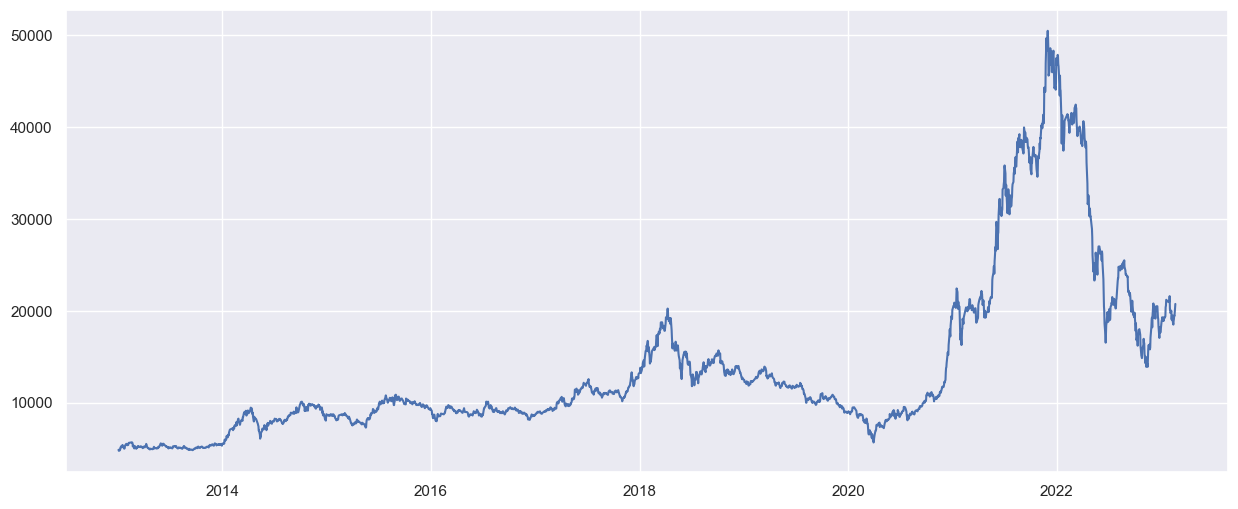

In [21]:
plt.plot(ts)

In [19]:
ts_diff = (ts - ts.shift(1))
# ts_log_diff = np.sign(ts_diff)*np.log(np.abs(ts_diff))
ts_diff.dropna(inplace=True)
print(len(ts_diff))
test_for_stationary(ts_diff)

2526
Results of Dickey-Fuller Test:
4.17356237070767e-15
Data is stationary
True


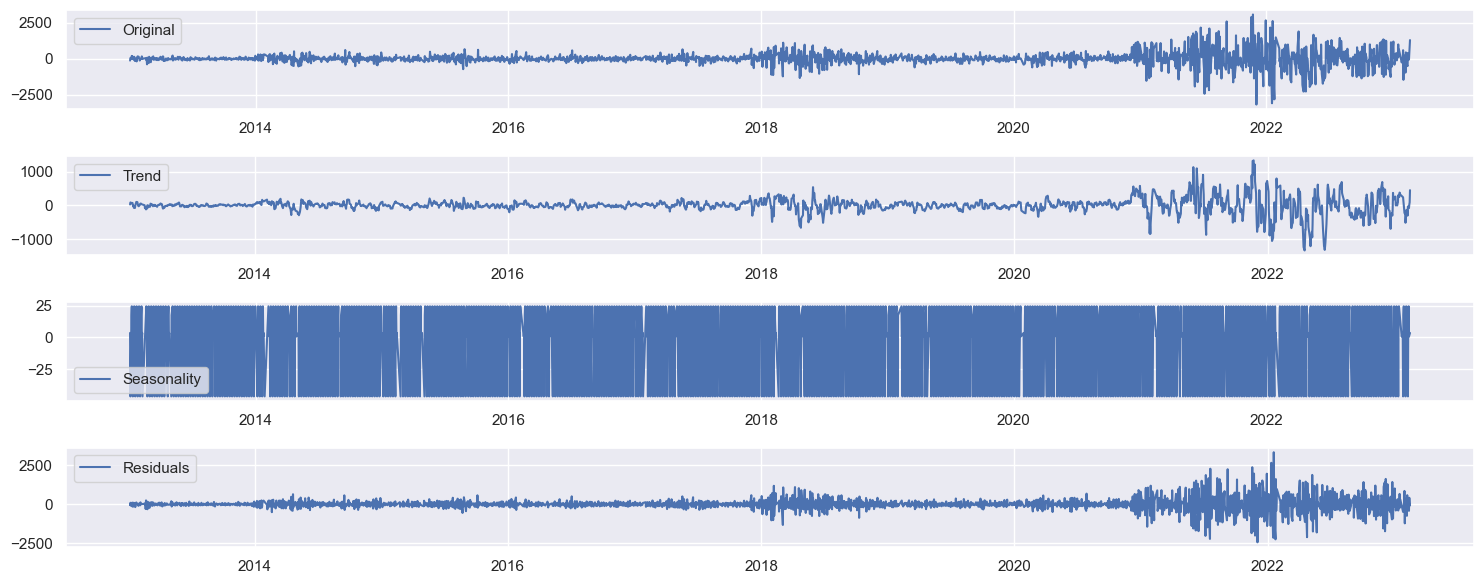

In [20]:
decomposition = seasonal_decompose(ts_diff, period=5)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_diff, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [32]:
decomposed_TS = residual
decomposed_TS.dropna(inplace=True)
test_for_stationary(decomposed_TS)

Results of Dickey-Fuller Test:
0.0
Data is stationary
True


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


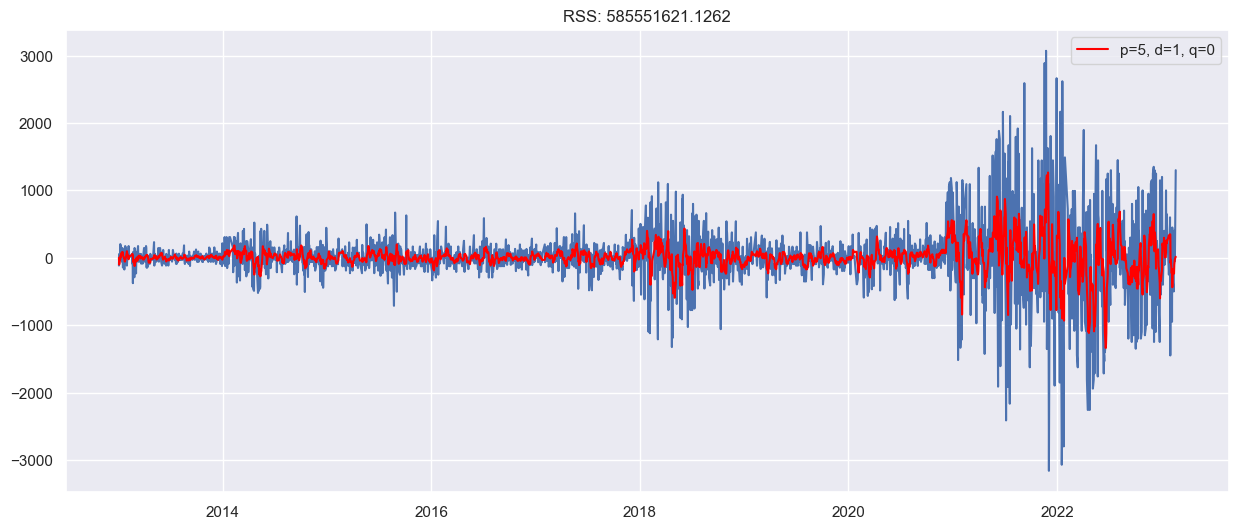

In [33]:
model = ARIMA(ts_diff, order=(5, 1, 0))
results_ARIMA = model.fit()
plt.plot(ts_diff)
plt.plot(results_ARIMA.fittedvalues, color='red', label='p=5, d=1, q=0')
RSS = results_ARIMA.fittedvalues - ts_diff
RSS.dropna(inplace=True)
plt.title('RSS: %.4f' % sum(RSS**2))
plt.legend(loc='best')

In [34]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

TradingDate
2013-01-03     0.000000
2013-01-04   -99.777044
2013-01-07   -20.906289
2013-01-08   -22.528971
2013-01-09    35.222074
dtype: float64


In [35]:
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                    SSI   No. Observations:                 2526
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -19180.224
Date:                Mon, 20 Feb 2023   AIC                          38372.447
Time:                        18:26:47   BIC                          38407.451
Sample:                             0   HQIC                         38385.149
                               - 2526                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8195      0.010    -82.006      0.000      -0.839      -0.800
ar.L2         -0.6956      0.011    -64.248      0.000      -0.717      -0.674
ar.L3         -0.5171      0.012    -44.380      0.0